In [ ]:
from tensorflow.keras.utils import plot_model
from sklearn.metrics import classification_report, average_precision_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# TRANSFER LEARNING

## 1. MobileNet

### Transfer Learning

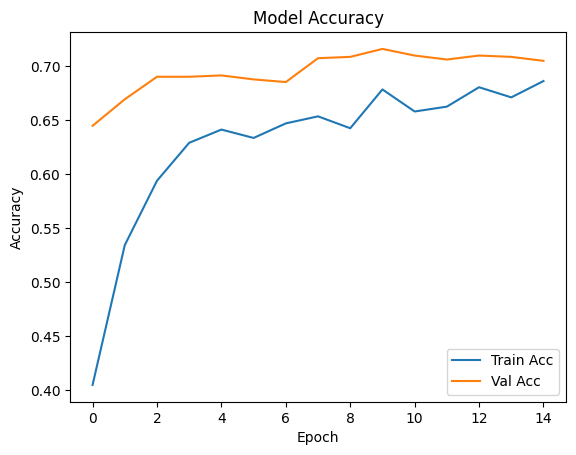

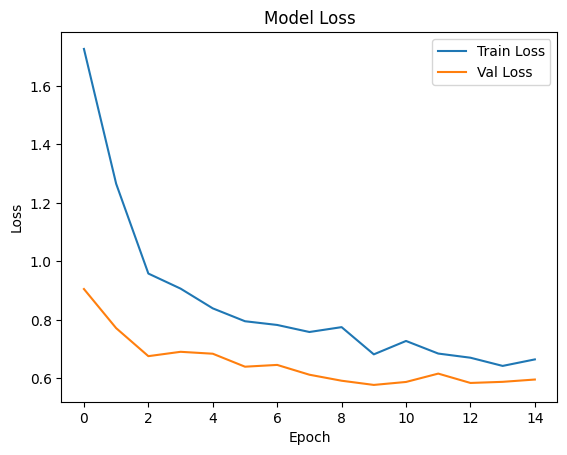

In [ ]:
#plot accuracy
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
pred_probs = model.predict(test_gen)
y_pred = np.argmax(pred_probs, axis=1)
y_true = test_gen.classes

print(classification_report(y_true, y_pred, target_names=test_gen.class_indices.keys()))

# mAP score calculate
map_score = average_precision_score(tf.keras.utils.to_categorical(y_true), pred_probs, average='macro')
print(f"mAP Score: {map_score:.2f}")

19/19 ━━━━━━━━━━━━━━━━━━━━ 16s 747ms/step
              precision    recall  f1-score   support

         Bin       0.49      0.22      0.31       156
       Glass       0.92      0.95      0.94       204
       Metal       0.54      0.76      0.63       153
       Other       0.27      0.88      0.41         8
     Plastic       1.00      1.00      1.00        82

    accuracy                           0.72       603
   macro avg       0.64      0.76      0.66       603
weighted avg       0.72      0.72      0.70       603

mAP Score: 0.73


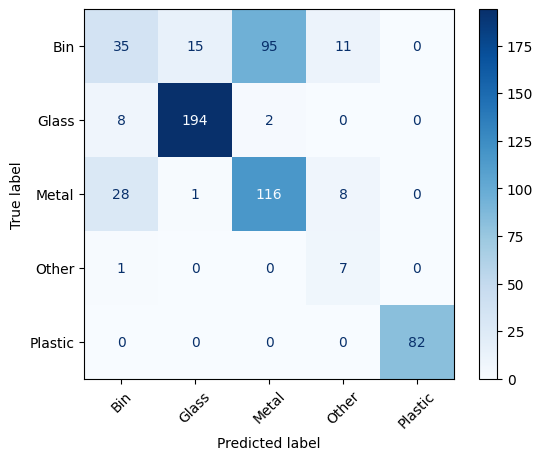

In [ ]:
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_gen.class_indices)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.show()

# Fine Tuning

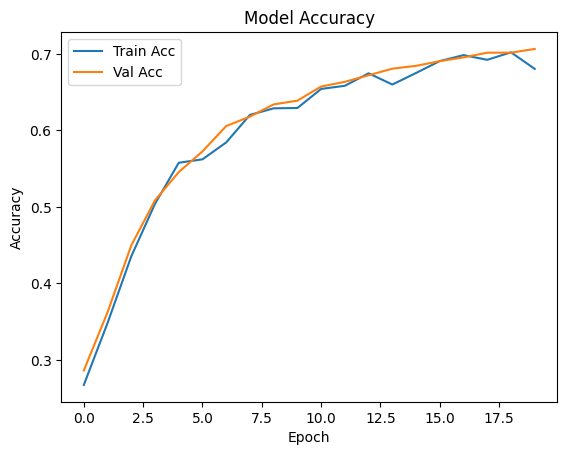

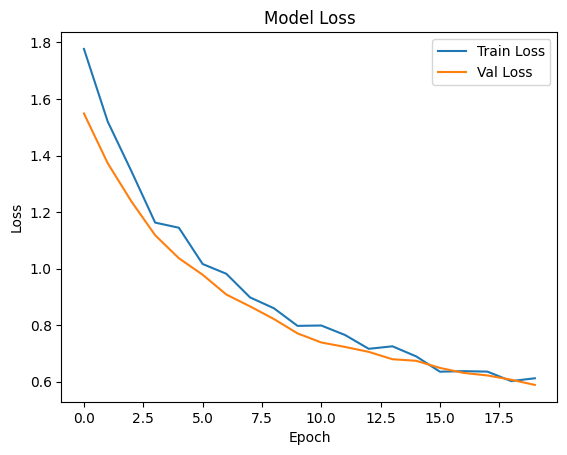

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


19/19 ━━━━━━━━━━━━━━━━━━━━ 13s 638ms/step
              precision    recall  f1-score   support

         Bin       0.50      0.41      0.45       156
       Glass       0.92      0.97      0.94       204
       Metal       0.56      0.56      0.56       153
       Other       0.28      0.88      0.42         8
     Plastic       1.00      1.00      1.00        82

    accuracy                           0.72       603
   macro avg       0.65      0.76      0.67       603
weighted avg       0.72      0.72      0.72       603

mAP Score: 0.76


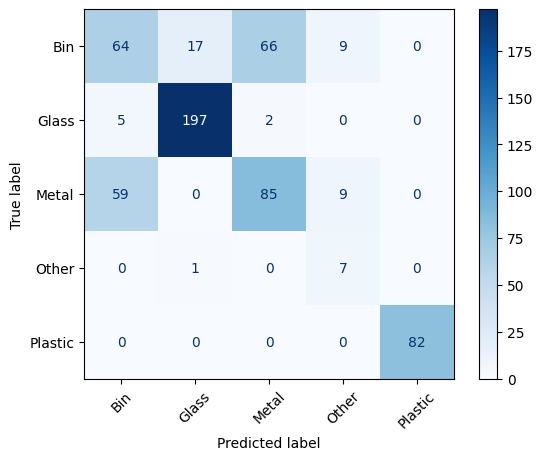

In [ ]:
#plot accuracy
plt.plot(history_finetune.history['accuracy'], label='Train Acc')
plt.plot(history_finetune.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#plot loss
plt.plot(history_finetune.history['loss'], label='Train Loss')
plt.plot(history_finetune.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

pred_probs = model.predict(test_gen)
y_pred = np.argmax(pred_probs, axis=1)
y_true = test_gen.classes

#classification report
print(classification_report(y_true, y_pred, target_names=test_gen.class_indices.keys()))

# mAP (macro average precision)
map_score = average_precision_score(tf.keras.utils.to_categorical(y_true), pred_probs, average='macro')
print(f"mAP Score: {map_score:.2f}")

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_gen.class_indices)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


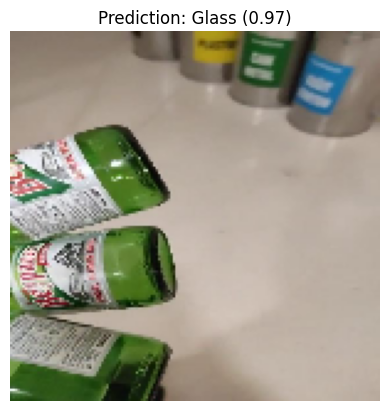

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

#load trained model
model = load_model('best_transfer_model.h5')

class_labels = list(train_gen.class_indices.keys())

def predict_and_show(img_path):
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    pred = model.predict(img_array)
    class_index = np.argmax(pred, axis=1)[0]
    class_label = class_labels[class_index]
    confidence = np.max(pred)

    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Prediction: {class_label} ({confidence:.2f})")
    plt.show()

predict_and_show("/content/trash_data/test/62a3371f42f9562a3371f42f9c_frame17_jpg.rf.681024b0dc2058774ccd0bc9ba717dec.jpg")